# Wishart distribution tests
    
See https://github.com/scipy/scipy/blob/master/scipy/stats/_multivariate.py

Unclear whether the mean of the Wishart distribution $W_p(\Sigma, \nu)$
is $\nu \Sigma$ (wikipedia, these simulations), or
$\Sigma$ (TJK13).

In [7]:
import scipy.stats._multivariate as mv

## The following is an alternative definition of a Wishart random variable.

In [8]:
W = mv.wishart_gen()

In [4]:
df = 3; scale = [[1,0], [0,2]];
df

3

In [9]:
W.rvs(df, scale)

array([[ 8.28873252, -1.53907837],
       [-1.53907837,  3.26568871]])

## Main program.

In [10]:
n_D = 10

In [12]:
sig2 = 5

In [13]:
cov     = np.diag([sig2 for i in range(n_D)])
cov_inv = np.diag([1/sig2 for i in range(n_D)])

In [28]:
a_n_S = []
a_trN_est = []
a_trN_m1_est = []
a_trN_m1_est2 = []

for n_S in range(n_D+5, 50, 1):
    W = mv.wishart(df=n_S-1, scale=cov)
    
    # The mean of a Wishart distribution in 1D is nu. Therefore,
    # we need to divide by nu=n_S-1 (?)
    cov_est = W.rvs() / (n_S-1)
    
    ## Covariance matrix
    
    # The division by n_D is to get the normalised trace.
    trN_est = np.trace(cov_est) / n_D
            
    ## Precision matrix 1: numerically invert covariance
    cov_est_inv = np.linalg.inv(cov_est)
    trN_m1_est = np.trace(cov_est_inv) / n_D
        
    ## Precision matrix 2: sample from inverse Wishart distribution
    Wm1 = mv.invwishart(df=n_S-1, scale=cov_inv)
    cov_est_inv2 = Wm1.rvs()
    trN_m1_est2 = np.trace(cov_est_inv2) * n_S / n_D
    
    # The bias of the inverse is 1/alpha. In other words, multiply with alpha
    # for unbiased estimate
    alpha = (n_S - n_D - 2) / (n_S - 1)
    #print(n_S, trN_est, sig2, '   ', trN_m1_est, trN_m1_est2, 1 / alpha / sig2, 1/sig2)
    
    a_n_S.append(n_S)
    a_trN_est.append(trN_est)
    a_trN_m1_est.append(trN_m1_est)
    a_trN_m1_est2.append(trN_m1_est2)

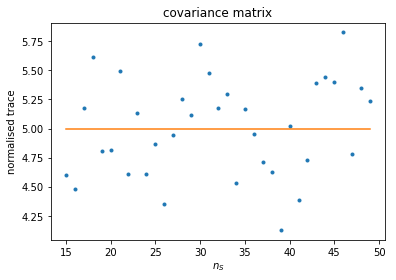

In [29]:
plt.plot(a_n_S, a_trN_est, '.', a_n_S, [sig2 for n_S in a_n_S])
plt.xlabel('$n_S$')
plt.ylabel('normalised trace')
plt.title('covariance matrix')
plt.show()

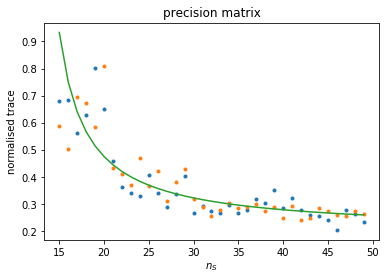

In [30]:
plt.plot(a_n_S, a_trN_m1_est, '.', \
         a_n_S, a_trN_m1_est2, '.', \
         a_n_S, [(n_S - 1) / (n_S - n_D - 2) / sig2 for n_S in a_n_S])
plt.xlabel('$n_S$')
plt.ylabel('normalised trace')
plt.title('precision matrix')
plt.show()